In [8]:
import os
import sys
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from tqdm import tqdm 

images_path = "../data/fashion-shoes-sport-casual-28/"

def grabcut(img):
    pass


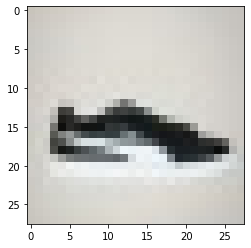

In [9]:
img_bgr = cv.imread(os.path.join(images_path, '1543.jpg'))
img = img_bgr[..., ::-1]

plt.imshow(img)



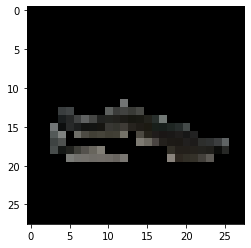

In [20]:
img = cv.imread(os.path.join(images_path, '1543.jpg'))
# img = img_bgr[..., ::-1]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## (2) Threshold
th, threshed = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## (3) Find the min-area contour
_cnts = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
cnts = sorted(_cnts, key=cv2.contourArea)
for cnt in cnts:
    if cv2.contourArea(cnt) > 100:
        break

## (4) Create mask and do bitwise-op
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [cnt],-1, 255, -1)
dst = cv2.bitwise_and(img, img, mask=mask)

## Save it
plt.imshow(dst)

## mask = np.zeros(img.shape[:2],np.uint8)   # img.shape[:2] = (413, 620)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (1,1,27,27)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]



plt.imshow(img)
plt.colorbar()
plt.show()